In [19]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [20]:
data=pd.read_csv("Red_wine.csv")

In [21]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
df=pd.DataFrame(data=data)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [25]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
698,9.4,0.615,0.28,3.2,0.087,18.0,72.0,1.0001,3.31,0.53,9.7,5


In [54]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [55]:
df.shape

(1599, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

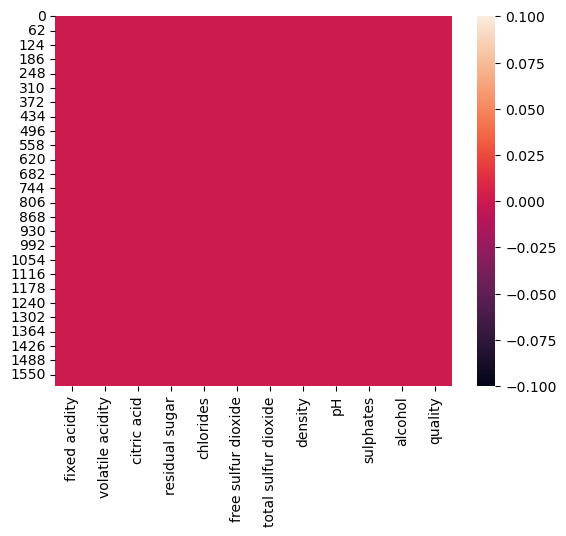

In [28]:
sns.heatmap(df.isnull())

No null data is present in dataset

In [29]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

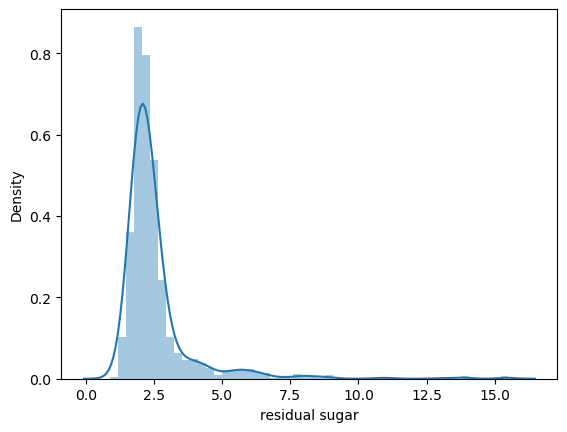

In [30]:
sns.distplot(df['residual sugar'])

In [18]:
from scipy.stats import boxcox

In [31]:
df["residual sugar"]=boxcox(df["residual sugar"],0)

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

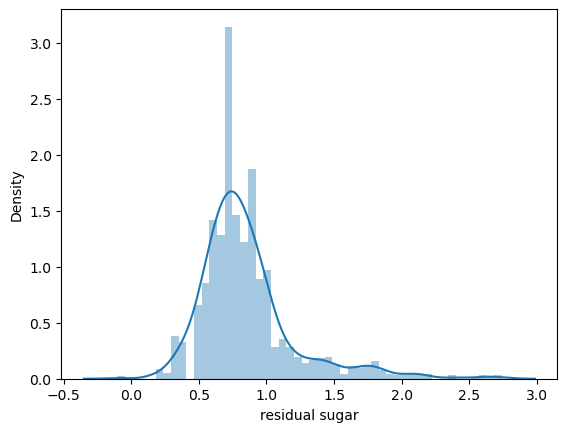

In [32]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

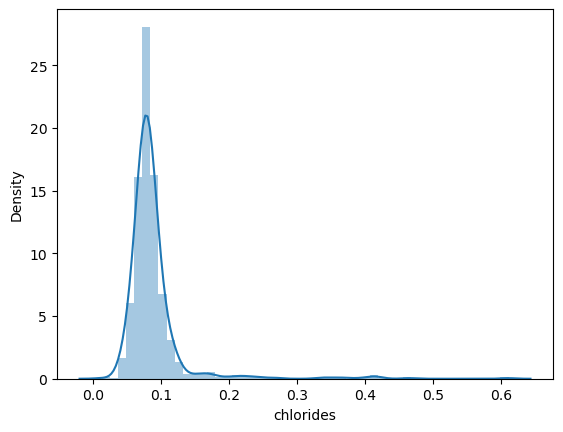

In [33]:
sns.distplot(df['chlorides'])

In [34]:
df["chlorides"]=boxcox(df["chlorides"],0)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

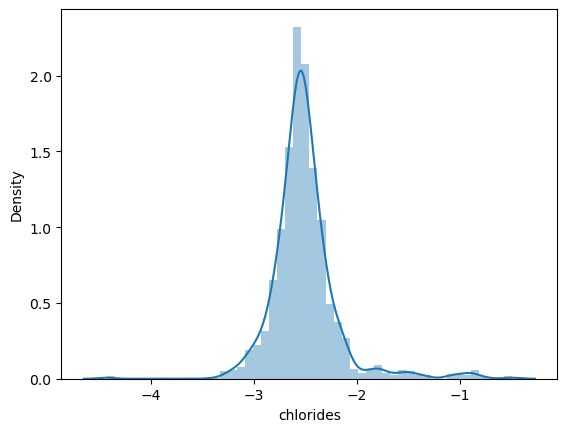

In [35]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

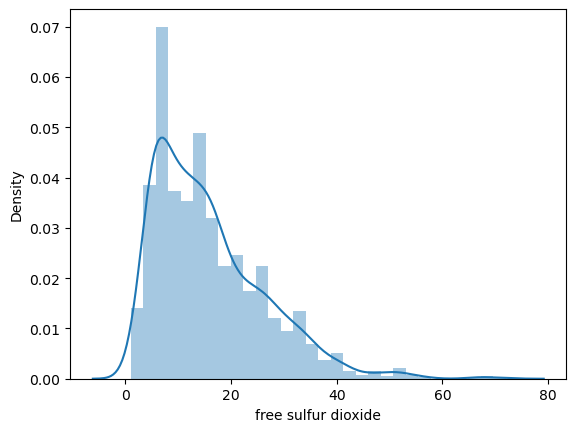

In [36]:
sns.distplot(df["free sulfur dioxide"])

In [40]:
df["free sulfur dioxide"]=boxcox(df["free sulfur dioxide"],0)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

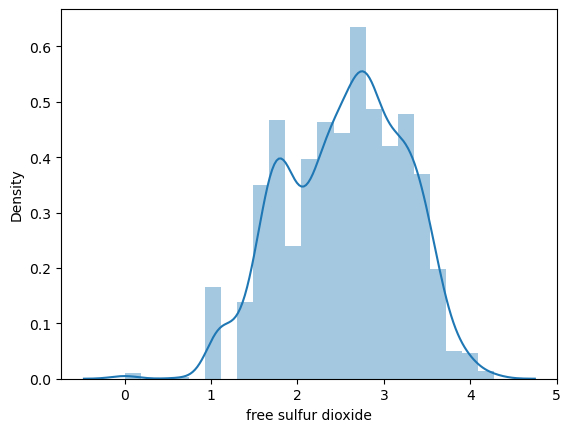

In [41]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

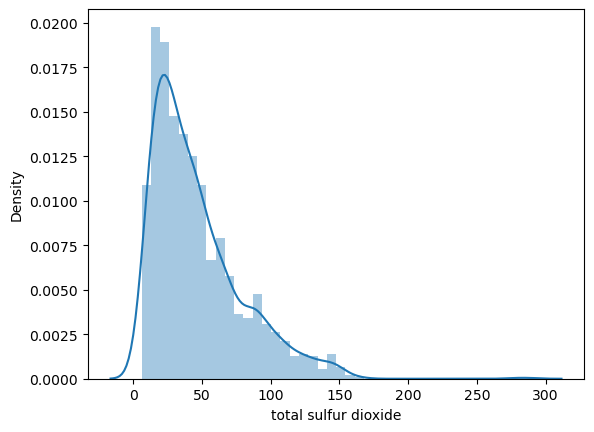

In [42]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

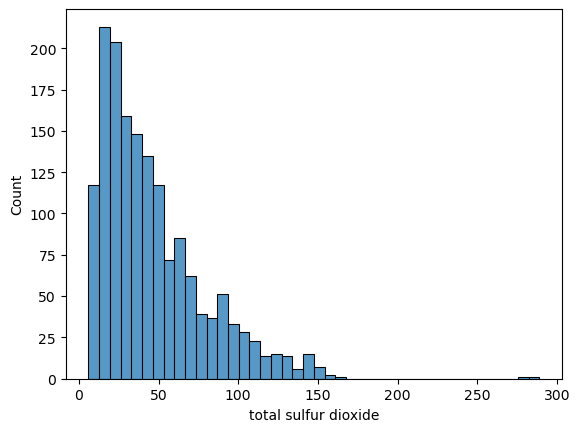

In [43]:
sns.histplot(df["total sulfur dioxide"])

In [44]:
df["total sulfur dioxide"]=boxcox(df["total sulfur dioxide"],0)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

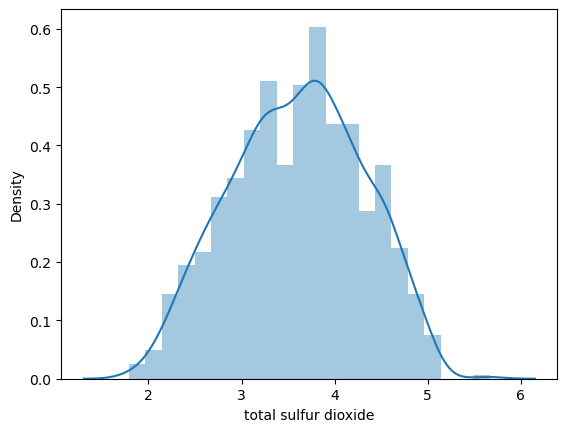

In [45]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

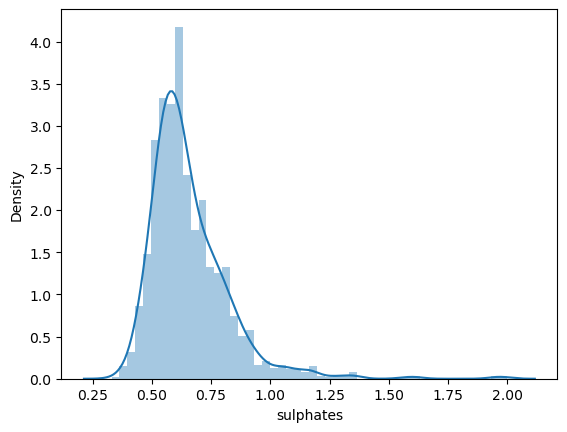

In [48]:
sns.distplot(df['sulphates'])

In [49]:
df['sulphates']=boxcox(df["sulphates"],0)

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

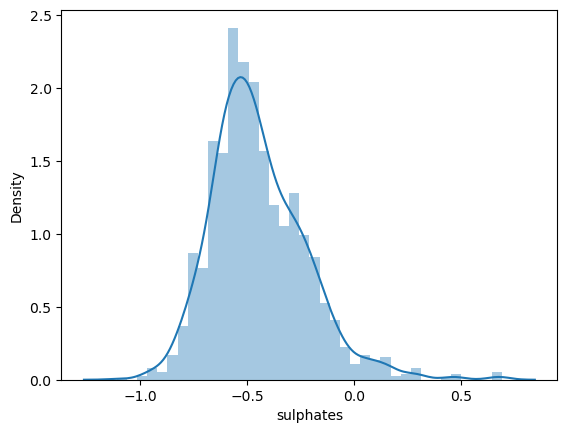

In [50]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

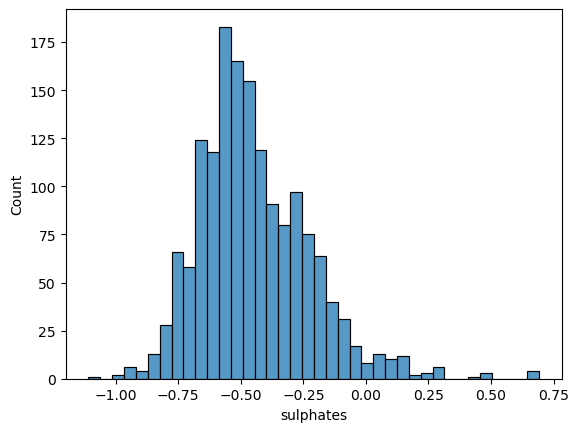

In [51]:
sns.histplot(df['sulphates'])

In [52]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [56]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.174742,0.175191,-0.179211,-0.117900,0.668047,-0.682978,0.204294,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.024278,0.108726,0.016666,0.073407,0.022026,0.234937,-0.300549,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.172286,0.181780,-0.089146,-0.003637,0.364947,-0.541904,0.331516,0.109903,0.226373
residual sugar,0.174742,0.024278,0.172286,1.000000,0.117102,0.093839,0.152920,0.417538,-0.091241,0.024800,0.080569,0.023533
chlorides,0.175191,0.108726,0.181780,0.117102,1.000000,-0.013597,0.073285,0.351939,-0.283629,0.243076,-0.303961,-0.176140
free sulfur dioxide,-0.179211,0.016666,-0.089146,0.093839,-0.013597,1.000000,0.784622,-0.039642,0.095763,0.054068,-0.082672,-0.050087
total sulfur dioxide,-0.117900,0.073407,-0.003637,0.152920,0.073285,0.784622,1.000000,0.105539,-0.014837,0.052191,-0.230858,-0.170143
density,0.668047,0.022026,0.364947,0.417538,0.351939,-0.039642,0.105539,1.000000,-0.341699,0.166124,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091241,-0.283629,0.095763,-0.014837,-0.341699,1.000000,-0.154116,0.205633,-0.057731
sulphates,0.204294,-0.300549,0.331516,0.024800,0.243076,0.054068,0.052191,0.166124,-0.154116,1.000000,0.135156,0.308642


<AxesSubplot:>

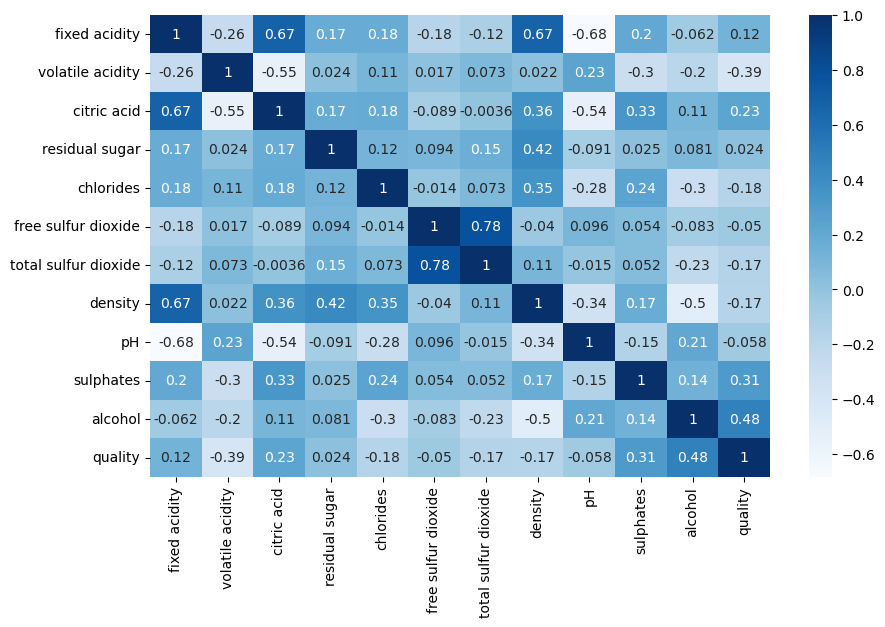

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)






Quality is highly correlated with alchol

Alcohal is higly negativly correlated with density.
Density is highly positively correlated with Fixed acidity.
volatile acidity is negatively correlated with quality

here we can drop volatile acidity from the dataset.

In [61]:
df.drop(['volatile acidity'],axis=1,inplace=True)

In [63]:
df.head(1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.0,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5


In [66]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [67]:
df.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,0.850232,-2.505462,2.546132,3.600721,0.996747,3.311113,-0.445260,10.422983,5.636023
std,1.741096,0.194801,0.357443,0.327215,0.685292,0.705393,0.001887,0.154386,0.223566,1.065668,0.807569
min,4.600000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996750,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.420000,0.955511,-2.407946,3.044522,4.127134,0.997835,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


key observations:

1.The mean is more than median (50%) in fixed acidity column .

2. There is a  difference in 75% percentile and max is fixed acidity, free sulphurdioxide , total sulfurdioxide, density ,ph,alcohol.

3.  2 observation suggest that there are  outliers presents in the columns mentioned in 2 observation.

<AxesSubplot:xlabel='fixed acidity'>

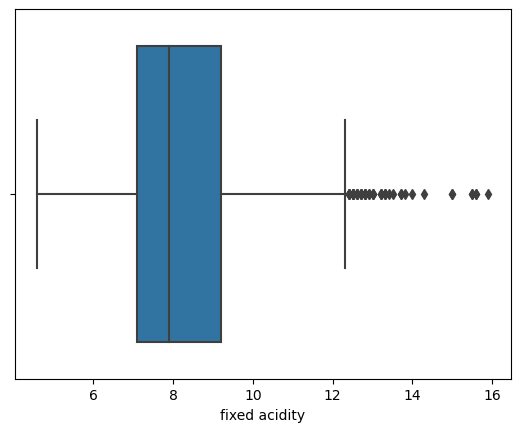

In [69]:
#lets check for outliers

sns.boxplot(df['fixed acidity'])

<AxesSubplot:xlabel='free sulfur dioxide'>

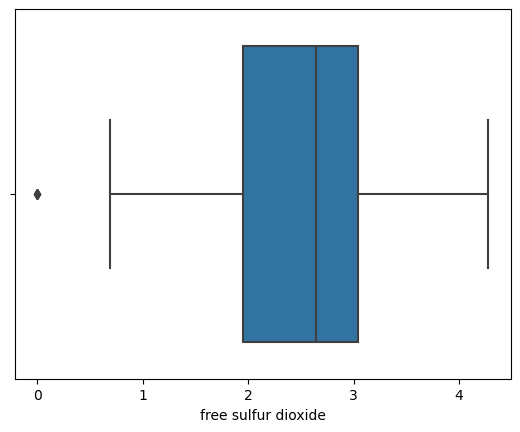

In [70]:
sns.boxplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

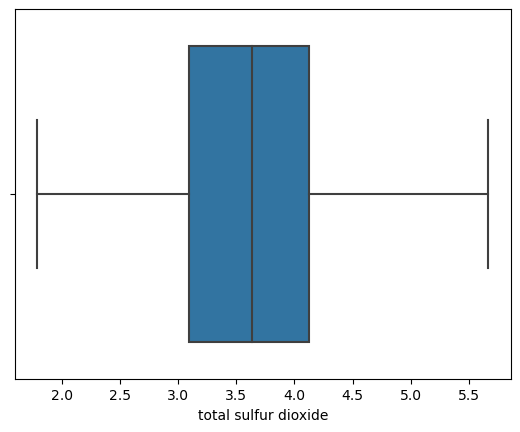

In [71]:
sns.boxplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density'>

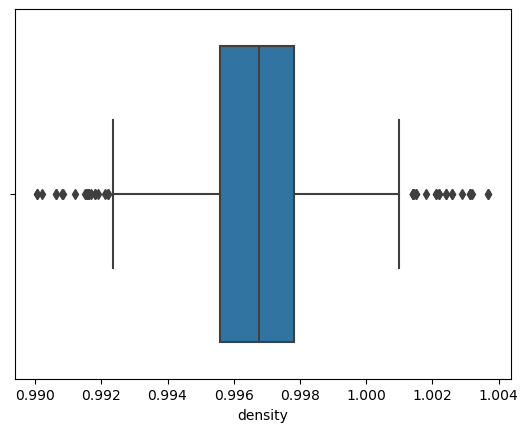

In [72]:
sns.boxplot(df['density'])

<AxesSubplot:xlabel='pH'>

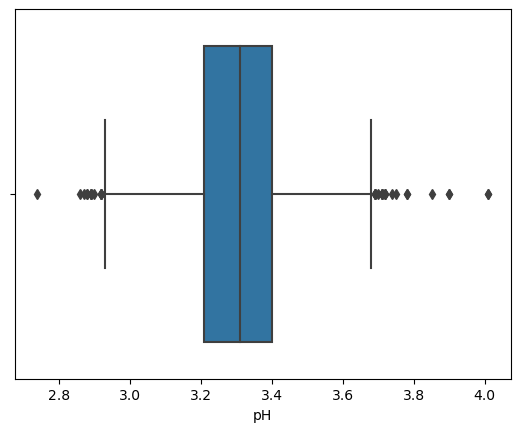

In [74]:
sns.boxplot(df['pH'])

<AxesSubplot:xlabel='sulphates'>

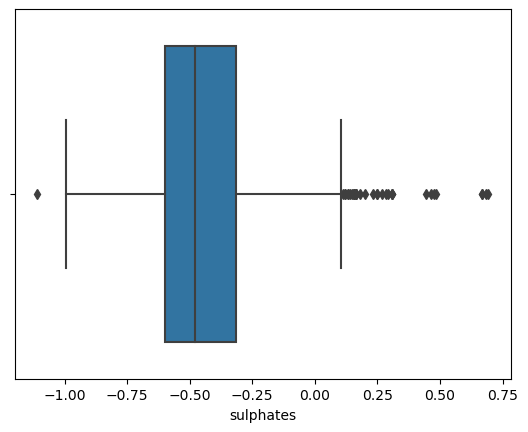

In [75]:
sns.boxplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol'>

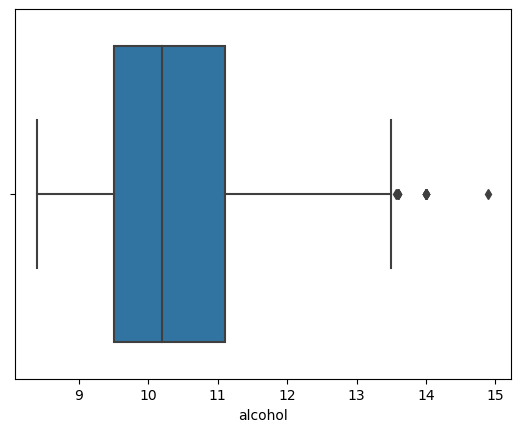

In [76]:
sns.boxplot(df['alcohol'])

<AxesSubplot:xlabel='quality'>

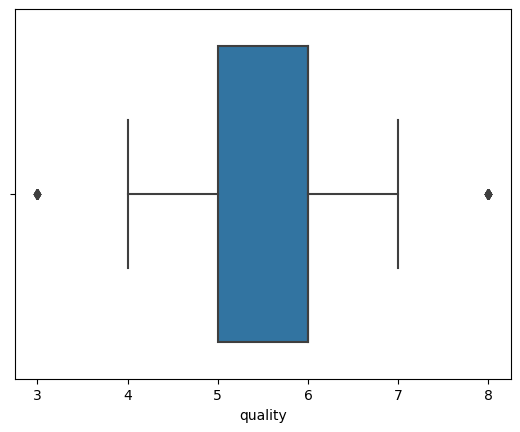

In [77]:
sns.boxplot(df['quality'])

fixed acidity              AxesSubplot(0.125,0.53;0.110714x0.35)
citric acid             AxesSubplot(0.257857,0.53;0.110714x0.35)
residual sugar          AxesSubplot(0.390714,0.53;0.110714x0.35)
chlorides               AxesSubplot(0.523571,0.53;0.110714x0.35)
free sulfur dioxide     AxesSubplot(0.656429,0.53;0.110714x0.35)
total sulfur dioxide    AxesSubplot(0.789286,0.53;0.110714x0.35)
density                    AxesSubplot(0.125,0.11;0.110714x0.35)
pH                      AxesSubplot(0.257857,0.11;0.110714x0.35)
sulphates               AxesSubplot(0.390714,0.11;0.110714x0.35)
alcohol                 AxesSubplot(0.523571,0.11;0.110714x0.35)
quality                 AxesSubplot(0.656429,0.11;0.110714x0.35)
dtype: object

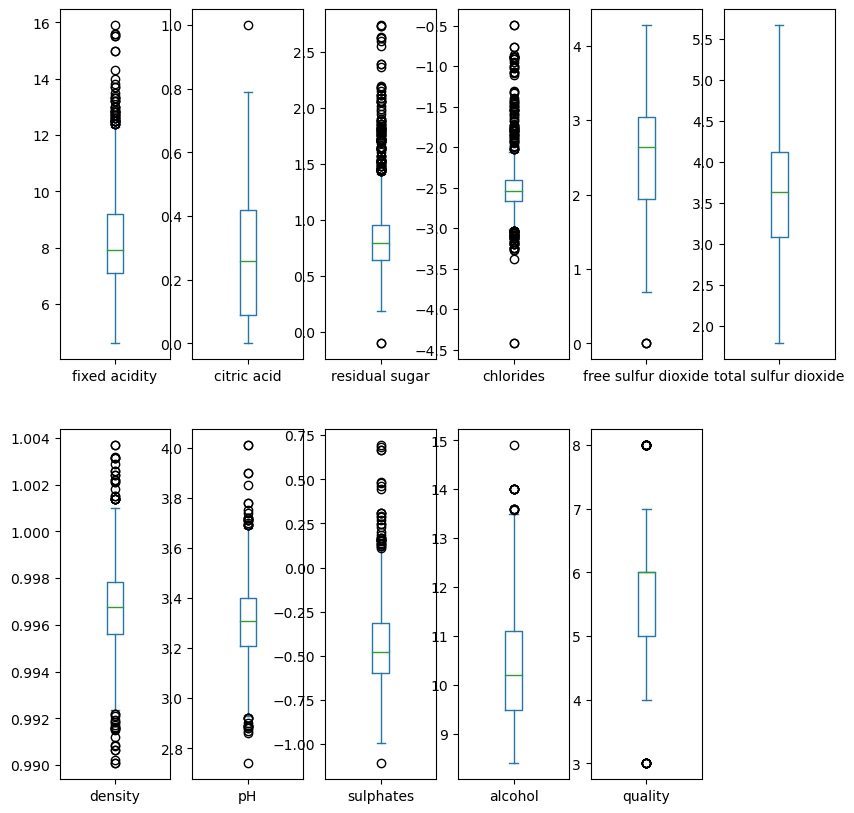

In [78]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

As we check through seaborn boxplot there are outliers present in data

Removing outliers

In [79]:
from scipy.stats import zscore

In [80]:
z=np.abs(zscore(df))
z

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,1.391472,0.583150,0.218763,0.216380,0.105451,0.558274,1.288643,0.602062,0.960246,0.787823
1,0.298547,1.391472,0.294627,0.558443,0.981997,0.856487,0.028261,0.719933,0.266658,0.584777,0.787823
2,0.298547,1.186070,0.048478,0.365302,0.236350,0.550592,0.134264,0.331177,0.064774,0.584777,0.787823
3,1.654856,1.484154,0.583150,0.259254,0.419050,0.700003,0.664277,0.979104,0.445052,0.584777,0.450848
4,0.528360,1.391472,0.583150,0.218763,0.216380,0.105451,0.558274,1.288643,0.602062,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.980669,0.439605,0.298111,1.342336,0.260175,0.978765,0.899886,0.445052,0.072294,0.787823
1595,1.390155,0.877968,0.172877,0.841175,1.631100,0.469536,0.862162,1.353436,0.764320,0.729364,0.450848
1596,1.160343,0.723916,0.048478,0.218763,1.198644,0.125016,0.533554,0.705508,0.705056,0.541630,0.450848
1597,1.390155,0.775267,0.439605,0.259254,1.342336,0.260175,0.676657,1.677400,0.459825,0.209308,0.787823


In [81]:
threshold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
         91,   92,   95,  106,  106,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  226,  226,  240,  243,  244,
        258,  258,  274,  281,  291,  324,  325,  339,  347,  374,  381,
        391,  396,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        517,  530,  535,  544,  554,  554,  555,  555,  557,  557,  566,
        567,  568,  588,  595,  608,  614,  639,  649,  652,  652,  652,
        666,  690,  692,  695,  723,  730,  754,  773,  776,  777,  821,
        832,  836,  836,  837,  837,  889,  899,  911,  917,  923, 1017,
       1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114, 1165,
       1186, 1235, 1244, 1260, 1269, 1269, 1270, 1270, 1299, 1300, 1316,
       1319, 1319, 1321, 1370, 1372, 1374, 1374, 1434, 1434, 1435, 1435,
       1469, 1474, 1474, 1476, 1476, 1478, 1505, 1558, 1570, 1574, 1589],
      dtype=int64), array([ 8,  3,  8,  3,  2,  3

In [82]:
df_new=df[(z<3).all(axis=1)]

In [83]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,5
1,7.8,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,9.8,5
2,7.8,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,9.8,5
3,11.2,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,9.8,6
4,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,10.5,5
1595,5.9,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,11.2,6
1596,6.3,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,11.0,6
1597,5.9,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,10.2,5


In [84]:
df=df_new

In [85]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,5
1,7.8,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,9.8,5
2,7.8,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,9.8,5
3,11.2,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,9.8,6
4,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,10.5,5
1595,5.9,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,11.2,6
1596,6.3,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,11.0,6
1597,5.9,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,10.2,5


The data is cleared now

In [86]:
x=df.iloc[:,0:-1]

In [87]:
x.shape

(1483, 10)

In [88]:
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4
1,7.8,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,9.8
2,7.8,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,9.8
3,11.2,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,9.8
4,7.4,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,10.5
1595,5.9,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,11.2
1596,6.3,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,11.0
1597,5.9,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,10.2


In [89]:
y=df.iloc[:,-1]

In [90]:
y.shape

(1483,)

In [91]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1483, dtype: int64

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=48)

In [182]:
xtrain.shape

(1038, 10)

In [183]:
ytrain.shape

(1038,)

In [184]:
lg=LinearRegression()

In [185]:
lg

LinearRegression()

In [186]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [187]:
lg.score(xtrain,ytrain)

0.36215608519502696

In [188]:
lg.coef_

array([  0.03923928,   0.17235073,  -0.0639669 ,  -0.20693056,
         0.20143354,  -0.22434881, -21.67442343,  -0.56497512,
         0.895673  ,   0.30777739])

In [189]:
lg.intercept_

25.77309692950218

In [190]:
pred=lg.predict(xtest)

In [191]:
print("error")
print("Mean squared error = ",mean_squared_error(ytest,pred))
print("Mean absolute error = ",mean_absolute_error(ytest,pred))
print("Root mean squared error = ",np.sqrt(mean_squared_error(ytest,pred)))

error
Mean squared error =  0.38002323218797246
Mean absolute error =  0.478683932635316
Root mean squared error =  0.616460243801636


In [192]:
lo=LogisticRegression()

In [193]:
lo

LogisticRegression()

In [194]:
lo.fit(xtrain,ytrain)

LogisticRegression()

In [195]:
lo.score(xtrain,ytrain)

0.6078998073217726

In [196]:
lpred=lo.predict(xtest)

In [197]:
print(accuracy_score(ytest,lpred))

0.6134831460674157


In [198]:
print(confusion_matrix(ytest,lpred))

[[  0   6   5   0   0]
 [  0 151  46   0   0]
 [  0  65 106   8   0]
 [  0   2  33  16   0]
 [  0   0   5   2   0]]


In [210]:
print(classification_report(ytest,lpred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.67      0.77      0.72       197
           6       0.54      0.59      0.57       179
           7       0.62      0.31      0.42        51
           8       0.00      0.00      0.00         7

    accuracy                           0.61       445
   macro avg       0.37      0.33      0.34       445
weighted avg       0.59      0.61      0.59       445



In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
ss=StandardScaler()

In [213]:
ss

StandardScaler()

In [218]:
x_t=ss.fit_transform(x)

In [219]:
x_t

array([[-0.54822044, -1.38819452, -0.62461286, ...,  1.37387497,
        -0.60193435, -1.00025406],
       [-0.30524049, -1.38819452,  0.44318059, ..., -0.81937296,
         0.37119674, -0.60787825],
       [-0.30524049, -1.1783166 ,  0.02580198, ..., -0.39487336,
         0.1450482 , -0.60787825],
       ...,
       [-1.21641531, -0.70609129,  0.02580198, ...,  0.73712557,
         0.86228521,  0.5692492 ],
       [-1.45939526, -0.75856077, -0.44999362, ...,  1.79837457,
         0.58758036, -0.21550243],
       [-1.39865028,  1.07787098,  1.55102543, ...,  0.52487577,
         0.22157043,  0.5692492 ]])

In [220]:
x_t.mean()

-5.7495029191646675e-18

In [221]:
x_t.std()

1.0

In [222]:
x_t.shape

(1483, 10)

In [223]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1483, dtype: int64

In [224]:
x=x_t

In [225]:
x.shape

(1483, 10)

In [226]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=42)

In [227]:
xtrain

array([[-0.91269037, -1.28325556, -0.28389586, ...,  0.24187604,
        -0.0917884 , -0.01931452],
       [-0.60896543, -0.28633546, -0.44999362, ...,  0.10037617,
        -1.48007633, -0.90216011],
       [-0.66971042, -0.02398807, -0.44999362, ..., -0.39487336,
        -0.97337158, -0.50978429],
       ...,
       [ 0.78816929,  1.34021838, -0.12552644, ...,  0.31262597,
         0.92867173,  1.94256456],
       [-1.39865028, -0.33880494,  0.1706889 , ...,  1.8691245 ,
         0.29694191,  2.04065852],
       [-0.06226054,  0.23835932, -0.62461286, ..., -0.53637323,
         0.44436751,  0.17687339]])

In [228]:
ytrain

1210    6
176     5
1375    5
696     6
490     6
       ..
1222    6
1399    6
940     7
1573    6
1218    6
Name: quality, Length: 993, dtype: int64

In [229]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [230]:
lg.score(xtrain,ytrain)

0.3456385688451423

In [231]:
pred_n=lg.predict(xtest)

In [232]:
print("error")
print("Mean squared error = ",mean_squared_error(ytest,pred_n))
print("Mean absolute error = ",mean_absolute_error(ytest,pred_n))
print("Root mean squared error = ",np.sqrt(mean_squared_error(ytest,pred_n)))

error
Mean squared error =  0.410313380185191
Mean absolute error =  0.5049006102358784
Root mean squared error =  0.6405570858129593


In [246]:
#now lets take the some data just to check the output
p=np.array([7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4])

In [247]:
p.shape

(10,)

In [248]:
p=p.reshape(1,-1)

In [249]:
p.shape

(1, 10)

In [250]:
lo.predict(p)

array([5], dtype=int64)

In [ ]:
#hence the quality of red wine is 5